# Reinforcement Learning
## Graded Assessment: RL Project



## Problem Definition

For this reinforcement learning project, the challenge involves developing an RL agent that can proficiently navigate the HighwayEnv, a minimalist simulation environment tailored for autonomous driving decision-making. The primary objective is to construct an RL agent capable of effectively managing the simulated traffic dynamics of HighwayEnv, and subsequently, to benchmark its performance against a pre-existing agent implemented via the [Stable Baselines3](https://github.com/DLR-RM/stable-baselines3) library.

### Environment Description
**HighwayEnv** simulates the complex scenario where autonomous vehicles are required to navigate traffic on a multi-lane highway. The overarching goal for these agents includes optimizing travel time, executing safe lane changes, maintaining appropriate speeds, and adhering to traffic regulations to avoid collisions.

### State Space (Observations)
The state space comprises:
- **Position and Velocity of the Agent Vehicle:** Longitudinal and lateral positions and velocities are critical for determining the agent's current and projected states.
- **Position and Velocity of Other Vehicles:** The relative positions and velocities of nearby vehicles are essential for spatial awareness and collision avoidance.
- **Road Geometry:** This includes the number of lanes and lane markings, which are crucial for proper lane adherence and navigation.

### Action Space
The agent can take several discrete actions:
- **Accelerate:** Increase the vehicle's speed.
- **Decelerate:** Reduce the vehicle's speed.
- **Change Lane to the Left/Right:** Shift to an adjacent left or right lane if it is safe and possible.
- **Maintain Current State:** Continue with the present speed and lane.

### Transition Dynamics
The dynamics of this environment are governed by both the physical laws of vehicle motion and the programmed behavior of other simulated vehicles, which follow basic traffic rules and patterns of lane adherence.

### Reward Function
The reward system is designed to promote safety, efficiency, comfort, and lane adherence:
- **Safety:** Imposes penalties for near-misses and collisions.
- **Efficiency:** Rewards are given for maintaining optimal speeds and minimizing travel time to goals.
- **Comfort:** Discourages excessive and abrupt vehicular maneuvers.
- **Lane Adherence:** Encourages maintaining lane discipline unless overtaking or avoiding an obstacle.

### Hypothesis
The hypothesis to be tested is whether a custom-implemented Deep Q-Network (DQN) can outperform an established RL agent from the Stable Baselines3 library in terms of cumulative rewards. This will be measured through the agent’s ability to adapt to varying traffic densities and complexities, ensuring both efficient and safe navigation.

### Objectives for the DQN Implementation
The project aims to implement a DQN that learns an optimal policy based on the defined state and action spaces, adhering to the specified transition dynamics and reward structure. The key objectives for the DQN agent include:
- Efficiently navigating through traffic without predefined rules for specific situations.
- Developing a balanced driving policy that optimizes speed, safety, and comfort.
- Demonstrating superior adaptability and performance in diverse traffic scenarios when compared to the existing solution.

This structured approach lays the groundwork for developing and evaluating the reinforcement learning model, focusing on fostering an autonomous driving strategy that can effectively operate within the realistic confines of highway traffic conditions.

## Background

Reinforcement Learning (RL) has emerged as a powerful method for solving decision-making problems where an agent learns to act in an environment by performing actions and receiving feedback through rewards. In the context of autonomous driving, particularly in complex environments like those simulated by HighwayEnv, RL can be leveraged to enable vehicles to make intelligent decisions dynamically.

**Deep Q-Networks (DQN)**, introduced by Mnih et al. (2015), have been pivotal in applying RL to environments with high-dimensional state spaces, such as video games and, relevantly, driving simulations (Mnih et al., 2015). DQN integrates deep neural networks with Q-learning, where the network approximates the Q-value function. The Q-value function quantifies the expected utility of taking a given action in a particular state, followed by following a certain policy. **Strengths** of DQN include its ability to handle environments with large state and action spaces and its robustness in learning stable policies in complex scenarios. However, **weaknesses** include its sample inefficiency—often requiring numerous interactions with the environment, which can be computationally expensive—and its tendency to overestimate Q-values leading to suboptimal policy decisions.

**Proximal Policy Optimization (PPO)** and **Trust Region Policy Optimization (TRPO)** are policy gradient methods that optimize the policy directly. These methods are noted for their stability and efficiency, which come from limiting the steps in policy space to avoid destructive large updates (Schulman et al., 2015; 2017). For autonomous driving, the **strength** of these methods lies in their continuous action space handling, making them suitable for controlling the nuanced actions of a vehicle. The **weakness**, however, is that they can be sensitive to hyperparameter settings and require careful tuning to achieve the best performance.

In autonomous driving simulations like those provided by HighwayEnv, several studies have demonstrated the effectiveness of these methods. For example, RL has been used to successfully navigate complex traffic scenarios, demonstrating significant potential in achieving human-like driving capabilities (Dosovitskiy et al., 2017). These environments often simulate realistic traffic conditions and provide a benchmark for evaluating different RL methods, including DQN and PPO, in terms of their ability to learn safe and efficient driving policies.

Comparative studies, such as those by Liang et al. (2018), have shown that while DQN can effectively learn policy for discrete action spaces in driving simulations, methods like PPO tend to outperform in terms of achieving smoother control and handling continuous action spaces, which are critical in real-world driving scenarios.

In summary, reinforcement learning offers significant promise for developing intelligent autonomous driving systems capable of operating in complex, dynamic environments. Both value-based methods like DQN and policy-based methods like PPO have their merits and limitations, making them suitable for different aspects of the driving problem. Continuous advancements in RL methods and computational resources are likely to further enhance their applicability and performance in autonomous driving tasks.

## Method

### Setting Up the Highway Environment

The highway-env environment introduces an exciting domain focused on autonomous driving and decision-making in traffic scenarios. This environment is designed for experimenting with various aspects of vehicle behavior, such as lane following, overtaking, and navigating through intersections, making it rich in learning opportunities for reinforcement learning applications.

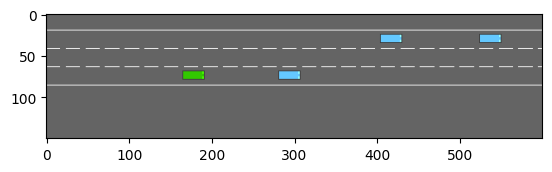

In [4]:
%matplotlib inline

import gymnasium as gym
from matplotlib import pyplot as plt

env = gym.make('highway-fast-v0', render_mode="rgb_array")
env.reset()

# To visualise a initial/idle state
action = env.unwrapped.action_type.actions_indexes["IDLE"]
obs, reward, done, truncated, info = env.step(action)

plt.imshow(env.render())
plt.show()

env.close()


### Exploring the Highway Environment

Exploring and understanding the environment by analysing the observation and action spaces, the dynamics of the environment, and the reward structure. Here’s how you can start exploring highway-env:

#### Understanding the Observation Space:

The observation space in highway-env can vary based on the configuration but typically includes the positions, velocities, and other attributes of nearby vehicles relative to the controlled vehicle. Understanding this space is crucial for designing your agent:

In [5]:
print("Observation space:", env.observation_space)

Observation space: Box(-inf, inf, (5, 5), float32)


#### Understanding the Action Space:
Actions in highway-env usually involve discrete decisions like changing lanes, accelerating, or braking:

In [6]:
print("Action space:", env.action_space)

Action space: Discrete(5)


#### Reward Structure Exploration

Understanding how rewards are assigned is crucial for designing your RL model. Perform actions and progress through the game to see what actions increase the score, how much reward is given for different achievements, and identify if there are any penalties.

In [7]:
# Example: Perform an action and observe the reward
env.reset()
for _ in range(50):
    _, reward, _, _, _ = env.step(env.action_space.sample())
    print("Reward received: ", reward)


Reward received:  0.7175582990397805
Reward received:  0.7347553717229882
Reward received:  0.8494110707274963
Reward received:  0.9801695933672692
Reward received:  0.9973885885268879
Reward received:  0.8838810761297416
Reward received:  0.868933584785261
Reward received:  0.9827402251569067
Reward received:  0.9977271078395926
Reward received:  0.999700689098218
Reward received:  0.33329391790593815
Reward received:  0.03333333333333336
Reward received:  0.03333333333333336
Reward received:  0.03333333333333336
Reward received:  0.03333333333333336
Reward received:  0.03333333333333336
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.03333333333333336
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward received:  0.0
Reward receive

#### Visualizing the Environment - Simulation:

You can visualize the environment in a Jupyter notebook or Python script to understand the dynamics visually. highway-env supports rendering directly to a Jupyter notebook using its render method.

In [8]:
import imageio
from IPython.display import Image, display

def generate_gif(frames):
    # Save the captured frames as a GIF
    gif_path = 'highway_simulation.gif'
    imageio.mimsave(gif_path, frames, fps=10)  # fps controls the speed of the animation

    # Display the GIF in the notebook
    display(Image(filename=gif_path))


Simple environment demonstration:

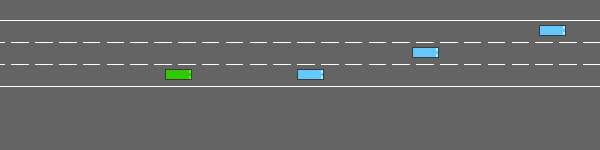

In [10]:
# reset environment
env.reset()

frames = []  # for storing the frames captured during the simulation

# Simulate the environment
for _ in range(50):
    action = env.action_space.sample()  # choose a random action
    obs, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    done = terminated or truncated
    if done:
        env.reset()

# Close the environment to free resources
env.close()

generate_gif(frames)

#### Defining the objective:

The agent's object is straighforward: maximize average speed while minimizing collisions, with an additional goal of staying in the right lane as much as possible for extra reward. These objectives align well with the rewards settings described (collision_reward, high_speed_reward, and implicitly mentioning a right_lane_reward). This clarity will guide the design of your reinforcement learning model and the reward structure you implement.

### Heavy Traffic

In [24]:
import gymnasium as gym

env = gym.make("highway-fast-v0", render_mode='rgb_array')
env.reset()


(array([[ 1.        ,  0.76346725,  0.        ,  0.3125    ,  0.        ],
        [ 1.        ,  0.1263491 ,  0.        , -0.03789194,  0.        ],
        [ 1.        ,  0.24673174,  0.        , -0.03197613,  0.        ],
        [ 1.        ,  0.37648582,  0.        , -0.03072859,  0.        ],
        [ 1.        ,  0.4867912 ,  0.        , -0.03123414,  0.        ]],
       dtype=float32),
 {'speed': 25,
  'crashed': False,
  'action': 1,
  'rewards': {'collision_reward': 0.0,
   'right_lane_reward': 0.0,
   'high_speed_reward': 0.5,
   'on_road_reward': 1.0}})

## Baseline Performance with Stable Baselines3

Stable Baselines3 is a set of reliable implementations of reinforcement learning algorithms in PyTorch. It is the next major version of Stable Baselines.

### Model Training

In [25]:
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN

model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn_baseline/")
model.learn(int(2e4))
model.save("highway_dqn_baseline/model")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn_baseline/DQN_5
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.2     |
|    ep_rew_mean      | 8.05     |
|    exploration_rate | 0.979    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 64       |
|    time_elapsed     | 0        |
|    total_timesteps  | 45       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 8.65     |
|    exploration_rate | 0.955    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 67       |
|    time_elapsed     | 1        |
|    total_timesteps  | 95       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5

### Model Evaluation

In [26]:
model = DQN.load("highway_dqn_baseline/model")
num_episodes = 100
highway_dqn_baseline_frames = []  # Store frames for each episode

for episode in range(num_episodes):
    done = truncated = False
    obs, info = env.reset()
    total_reward = 0
    steps = 0
    
    while not (done or truncated):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        frame = env.render()
        highway_dqn_baseline_frames.append(frame)
        total_reward += reward
        steps += 1
    
    print(f"Episode {episode + 1}: Total Reward = {total_reward}, Steps = {steps}")

env.close()

Episode 1: Total Reward = 23.285366065523935, Steps = 30
Episode 2: Total Reward = 22.797813107567947, Steps = 27
Episode 3: Total Reward = 27.316765912362758, Steps = 30
Episode 4: Total Reward = 7.098710874823523, Steps = 9
Episode 5: Total Reward = 22.91893263557928, Steps = 30
Episode 6: Total Reward = 22.518932269559674, Steps = 30
Episode 7: Total Reward = 23.352931778494558, Steps = 30
Episode 8: Total Reward = 1.8, Steps = 3
Episode 9: Total Reward = 14.753554502369047, Steps = 19
Episode 10: Total Reward = 6.71296719212355, Steps = 8
Episode 11: Total Reward = 10.599377717389222, Steps = 13
Episode 12: Total Reward = 10.652463017863719, Steps = 14
Episode 13: Total Reward = 6.399371741791317, Steps = 8
Episode 14: Total Reward = 23.186265529781203, Steps = 30
Episode 15: Total Reward = 5.799649439447541, Steps = 7
Episode 16: Total Reward = 24.553554502369668, Steps = 30
Episode 17: Total Reward = 24.01959888645741, Steps = 30
Episode 18: Total Reward = 8.019864435830614, Step

### Baseline model - Test Visual Inspection


In [27]:
from moviepy.editor import ImageSequenceClip

# Specify the frame rate (frames per second)
fps = 14

# Create a video clip from the frames
clip = ImageSequenceClip(highway_dqn_baseline_frames, fps=fps)
clip.write_videofile('highway_baseline_performance.mp4', codec='libx264')


Moviepy - Building video highway_baseline_performance.mp4.
Moviepy - Writing video highway_baseline_performance.mp4



Moviepy - Done !
Moviepy - video ready highway_baseline_performance.mp4


## Building the DQN Model
Next, define your DQN model. Here's an example using TensorFlow/Keras:

### Initialize the DQN Model

Before we proceed, initialize your model by specifying the input shape and the number of actions:


### Atari Space Invaders Implementation



As you can see, `reset()` has returned a valid initial state as a four-tuple. The function `plot()` uses the same colour-scheme as described above, but also includes a yellow grid-square to indicate the current position of the agent.

Let's make the agent go upward by using `step(1)`, then inspect the result (recall that action `1` increments the agent's vertical speed while leaving the agent's horizontal speed unchanged).

Results: A presentation of your results, showing how quickly and how well your agent(s) learn (i.e., improve their policies). Include informative baselines for comparison (e.g. the best possible performance, the performance of an average human, or the performance of an agent that selects actions randomly).

Discussion: An evaluation of how well you solved your chosen problem.

Future work: A discussion of potential future work you would complete if you had more time.
Personal experience: A discussion of your personal experience with the project, such as difficulties or pleasant surprises you encountered while completing it.

## References

Mnih, V., Kavukcuoglu, K., Silver, D., Rusu, A. A., Veness, J., Bellemare, M. G. & De Freitas, N. (2015). Human-level control through deep reinforcement learning. Nature, 518(7540), 529-533.

Oudeyer, P. Y., & Kaplan, F. (2007). Intrinsic motivation systems for autonomous mental development. IEEE Transactions on Evolutionary Computation, 11(1), 26-50.

Schaul, T., Hung, A., Pi-Chang, H., & Sutskever, I. (2015, December). Prioritized experience replay. In Advances in neural information processing systems (pp. 4662-4670).

Wang, Z., Schaul, T., Hessel, M., Van Hasselt, H., & Wierstra, D. (2016). Dueling network architectures for deep reinforcement learning. In International conference on machine learning (pp. 1994-2003).


- Mnih, V. et al. (2015). Human-level control through deep reinforcement learning. *Nature*, 518(7540), 529-533.
- Schulman, J., et al. (2015). Trust Region Policy Optimization. *International Conference on Machine Learning (ICML)*.
- Schulman, J., et al. (2017). Proximal Policy Optimization Algorithms. *arXiv preprint arXiv:1707.06347*.
- Dosovitskiy, A. et al. (2017). Learning to act by predicting the future. *International Conference on Learning Representations (ICLR)*.
- Liang, X., et al. (2018). Deep Reinforcement Learning for Autonomous Driving. *Machine Learning Systems Workshop at NeurIPS*.
